<a href="https://colab.research.google.com/github/hhijo/hhijo/blob/main/TESLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
#Reading data
data=pd.read_csv("/content/TESLA.csv")
print(data)

      Unnamed: 0        Date        Open        High         Low       Close  \
0              0  29/06/2010    1.266667    1.666667    1.169333    1.592667   
1              1  30/06/2010    1.719333    2.028000    1.553333    1.588667   
2              2  01/07/2010    1.666667    1.728000    1.351333    1.464000   
3              3  02/07/2010    1.533333    1.540000    1.247333    1.280000   
4              4  06/07/2010    1.333333    1.333333    1.055333    1.074000   
...          ...         ...         ...         ...         ...         ...   
3529        3529  09/07/2024  251.000000  265.609985  250.300003  262.329987   
3530        3530  10/07/2024  262.799988  267.589996  257.859985  263.260010   
3531        3531  11/07/2024  263.299988  271.000000  239.649994  241.029999   
3532        3532  12/07/2024  235.800003  251.839996  233.089996  248.229996   
3533        3533  15/07/2024  255.964996  265.579987  251.729996  252.639999   

         Volume  
0     281494500  
1  

In [7]:
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,29/06/2010,1.266667,1.666667,1.169333,1.592667,281494500
1,1,30/06/2010,1.719333,2.028000,1.553333,1.588667,257806500
2,2,01/07/2010,1.666667,1.728000,1.351333,1.464000,123282000
3,3,02/07/2010,1.533333,1.540000,1.247333,1.280000,77097000
4,4,06/07/2010,1.333333,1.333333,1.055333,1.074000,103003500


In [8]:
data.isnull().sum()

,0
Unnamed: 0,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(3534, 7)

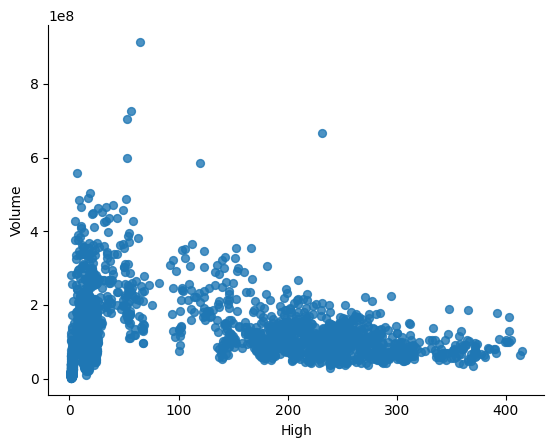

In [11]:
# Scatter plot
data.plot(kind='scatter', x="High", y="Volume", s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns you want to normalize (excluding non-numeric ones)
numeric_columns = ['Open', 'High', 'Low', 'Close']
data_to_normalize = data[numeric_columns]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(data_to_normalize)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)

# If you want to replace the original columns in 'data' with the normalized ones:
data[numeric_columns] = normalized_df

In [14]:
#Creating x and y values: X being the indepedent variable and y being the dependant variable

x=data[["High"]]
y=data[["Volume"]]

In [15]:
#creating the model
model=linear_model.LinearRegression()


In [16]:
#splitting the data into 70% training and 30% testing
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [17]:
print(x_train.shape)
print(y_train.shape)

(2473, 1)
(2473, 1)


In [18]:
#training the model

model.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred=model.predict(x_test)

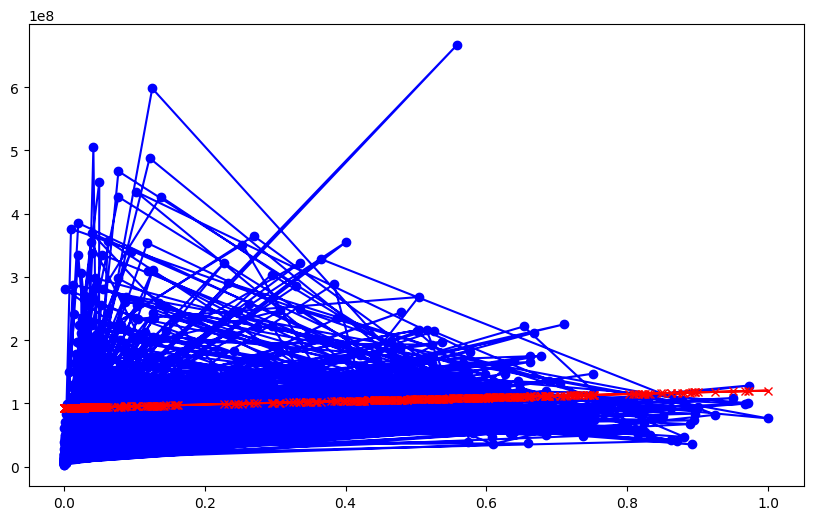

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='Actual Values', color='blue', marker='o')

# Plot predicted values
plt.plot(x_test, y_pred, label='Predicted Values', color='red', marker='x')


In [21]:
model.intercept_

array([92701355.00909753])

In [22]:
model.coef_

array([[27530118.87202373]])

In [23]:
predicted_weigtht= model.predict([[1.75]])
print(predicted_weigtht)

[[1.40879063e+08]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
# Evaluating our created model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Mean squared error")
print(mean_squared_error(y_test,y_pred))
print("R_squared")
print(r2_score(y_test,y_pred))
print("Mean absolute error")
print(mean_absolute_error(y_test,y_pred))

Mean squared error
6056923585612419.0
R_squared
0.01875972903964851
Mean absolute error
54709322.479941055


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'x' and 'y' are already defined as in your code
x=data[["High"]]
y=data[["Volume"]]

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Creating the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Training the model
tree_model.fit(x_train, y_train)

# Making predictions
y_pred = tree_model.predict(x_test)

# Evaluating the model
print("Decision Tree Metrics:")
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R_squared:", r2_score(y_test, y_pred))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))

Decision Tree Metrics:
Mean squared error: 5397257894830089.0
R_squared: 0.1256276021467274
Mean absolute error: 44799072.47879359
